In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance/StudentsPerformance_with_headers.csv
/kaggle/input/students-performance/highereducationstudentsperformanceevaluation/DATA (1).csv


# > ***Exploring Test Size Impact on Decision Tree Performance on Sample Dataset using Adjusted Rand Index***

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics.cluster import adjusted_rand_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = pd.read_csv("/kaggle/input/students-performance/highereducationstudentsperformanceevaluation/DATA (1).csv")
file.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [4]:
# Here, I've removed the column containing student IDs from the dataset.
file.drop("STUDENT ID",axis=1,inplace=True)
file.sample(5)

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
104,1,1,2,3,2,2,2,1,2,2,...,1,1,2,3,2,2,1,1,7,3
57,2,2,2,3,1,1,2,1,1,1,...,1,1,3,2,3,1,5,4,1,4
58,3,2,2,3,2,2,1,3,1,1,...,1,1,3,2,2,2,5,4,1,3
33,2,1,2,3,1,2,1,1,1,1,...,1,1,1,3,2,2,2,3,1,2
28,3,2,2,3,2,2,1,1,4,2,...,1,1,3,2,3,3,5,4,1,3


In [5]:
f = np.array(file)
X = file.iloc[:,:-1]
y = list(file.iloc[:,-1])

print(X.shape, len(y))

(145, 31) 145


In [6]:
clf = tree.DecisionTreeClassifier()

j = [0.2,0.3,0.4,0.5]
j1 = ["0.2","0.3","0.4","0.5"]
l2 = []

In [7]:
for i in j:
    X_train, test_x, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 42)
    print(X_train.shape, test_x.shape)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(test_x)
    l2.append(adjusted_rand_score(y_test, y_pred), )
    print("ARI for the iteration", 1, "for test size of", i, "is: ", adjusted_rand_score(y_test, y_pred))
    print(l2)
    print("")

(116, 31) (29, 31)
ARI for the iteration 1 for test size of 0.2 is:  0.018869864774538538
[0.018869864774538538]

(101, 31) (44, 31)
ARI for the iteration 1 for test size of 0.3 is:  0.09502274870236276
[0.018869864774538538, 0.09502274870236276]

(87, 31) (58, 31)
ARI for the iteration 1 for test size of 0.4 is:  0.04039524459884323
[0.018869864774538538, 0.09502274870236276, 0.04039524459884323]

(72, 31) (73, 31)
ARI for the iteration 1 for test size of 0.5 is:  0.05118078504070283
[0.018869864774538538, 0.09502274870236276, 0.04039524459884323, 0.05118078504070283]



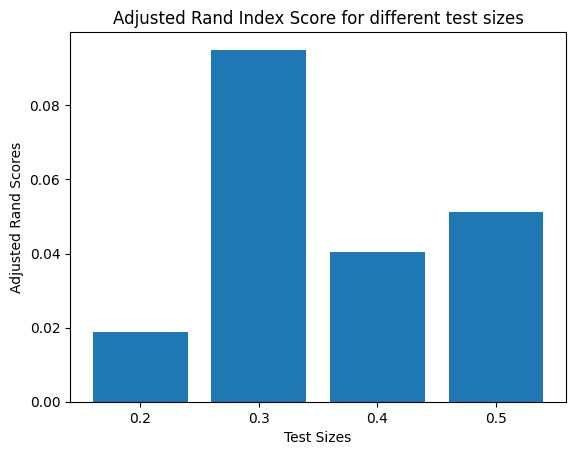

In [8]:
# plotting graph
fig = plt.figure()
plt.bar(j1, l2)
plt.title("Adjusted Rand Index Score for different test sizes")
plt.xlabel("Test Sizes")
plt.ylabel("Adjusted Rand Scores")
plt.show()